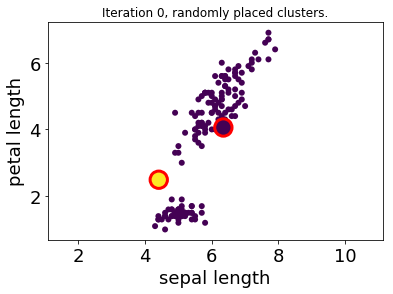

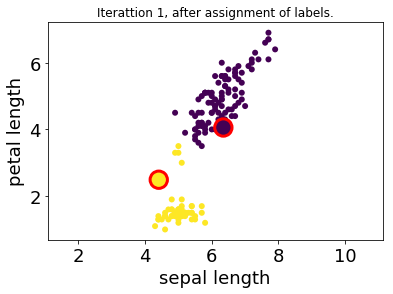

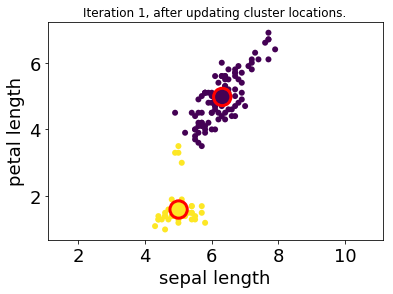

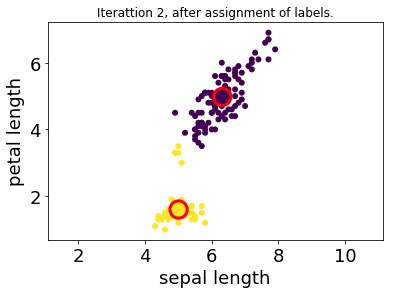

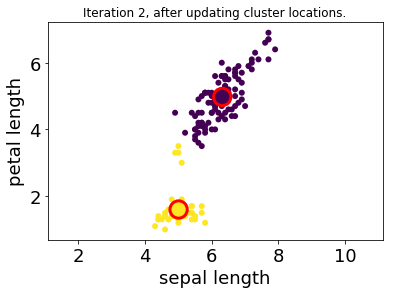

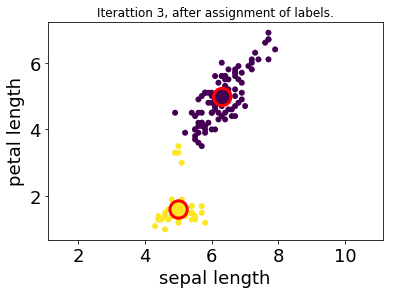

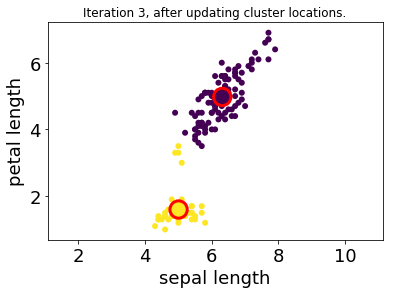

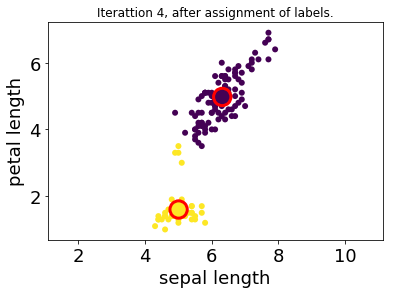

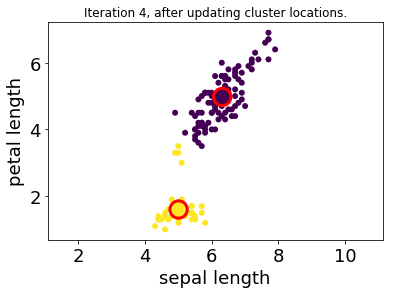

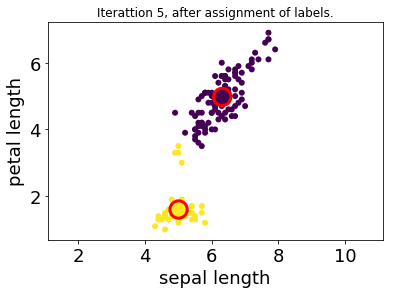

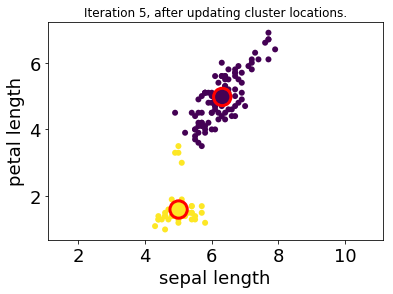

In [10]:
import numpy as np
import matplotlib.pyplot as plt

clusterNum = 2
iterationNum = 5

attrNames = ["sepal length", "sepal width", "petal length", "petal width"]
targetAttr = [0,2]

datalist = []
f = open('iris.data', 'r')
for line in f:
    line = line.rstrip()
    elems = line.split(',')
    if len(elems) > 1:
      datalist.append(elems[:-1])
f.close()

X = np.float_(np.array(datalist))
samples = X[:,targetAttr]
minVec = np.min(X,axis=0)
maxVec = np.max(X,axis=0)

def initializeClusters(samples, clusterNum):
    maxVec = np.max(samples,axis=0)
    minVec = np.min(samples,axis=0)
    clusterCenters = []
    for clusterID in range(clusterNum):
        clusterCenters.append(np.array([np.random.uniform(minVal,maxVal) for minVal, maxVal in zip(minVec, maxVec)]))        
    return clusterCenters

def updateClusterCenters(samples, assignments, clusterNum):
    clusterCenters = []
    for clusterID in range(clusterNum):
        sampleList = []
        for sampleID, sample in enumerate(samples):
            if assignments[sampleID] == clusterID:
                sampleList.append(sample)
        clusterCenters.append(np.mean(np.array(sampleList), axis=0))
    return clusterCenters

def assignToClosest(samples, clusterCenters):
    assignments = []
    for sample in samples:
        closestClusterID = np.argmin([np.linalg.norm(sample - clusterCenter) for clusterCenter in clusterCenters])
        assignments.append(closestClusterID)
    return assignments

def drawScatter(samples, assignments, clusterCenters, title):
    fig, ax = plt.subplots()
    ax.scatter(samples[:,0], samples[:,1], c=assignments, lw=0)
    clusterCentersArray = np.array(clusterCenters)
    clusterNum = len(clusterCenters)
    ax.scatter(clusterCentersArray[:,0], clusterCentersArray[:,1], edgecolors="red", c=[i for i in range(clusterNum)], s=300, lw=3)
    ax.axis('equal')
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)
    ax.set_title(title)
    ax.set_xlabel(attrNames[targetAttr[0]], fontsize=18)
    ax.set_ylabel(attrNames[targetAttr[1]], fontsize=18)
    plt.show()

clusterCenters = initializeClusters(samples, clusterNum)
initial_assignments = np.array([0 for i in range(samples.shape[0])])
drawScatter(samples, initial_assignments, clusterCenters, 'Iteration 0, randomly placed clusters.')
for i in range(iterationNum):
    assignments = assignToClosest(samples, clusterCenters)
    drawScatter(samples, assignments, clusterCenters, 'Iterattion ' + str(i+1) + ', after assignment of labels.')
    clusterCenters = updateClusterCenters(samples, assignments, clusterNum)
    drawScatter(samples, assignments, clusterCenters, 'Iteration ' + str(i+1) + ', after updating cluster locations.')
    

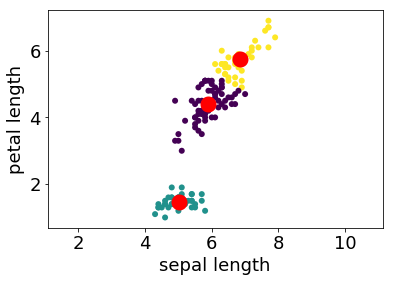

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import numpy as np

attrNames = ["sepal length", "sepal width", "petal length", "petal width"]
targetAttr = [0,2]

datalist = []
f = open('iris.data', 'r')
for line in f:
    line = line.rstrip()
    elems = line.split(',')
    if len(elems) > 1:
      datalist.append(elems[:-1])
f.close()

X = np.float_(np.array(datalist))

kres = KMeans(n_clusters=3)
clus_labels = kres.fit_predict(X)

clusCent = kres.cluster_centers_

fig, ax = plt.subplots()
ax.scatter(X[:, targetAttr[0]], X[:, targetAttr[1]], c=clus_labels, lw=0)

ax.scatter(clusCent[:, targetAttr[0]], clusCent[:,targetAttr[1]], edgecolors="red", c="red", lw=10)

ax.axis('equal')
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlabel(attrNames[targetAttr[0]], fontsize=18)
ax.set_ylabel(attrNames[targetAttr[1]], fontsize=18)

plt.show()

In [28]:
X.shape

(150, 4)

In [26]:
len(clus_labels)

150

In [30]:
len(datalist)

150

In [65]:
d

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


Text(0,0.5,'Happiness')

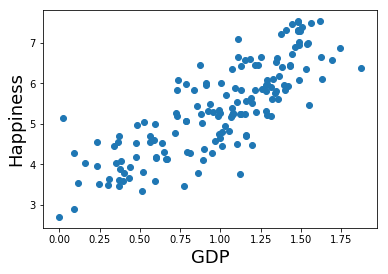

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
d = pd.read_csv('2017.csv')
happiness = np.array(d['Happiness.Score'])
gdp = np.array(d['Economy..GDP.per.Capita.'])
family = np.array(d['Family'])
plt.scatter(gdp,happiness)
plt.xlabel('GDP', fontsize=18)
plt.ylabel('Happiness', fontsize=18)

Text(0,0.5,'Happiness')

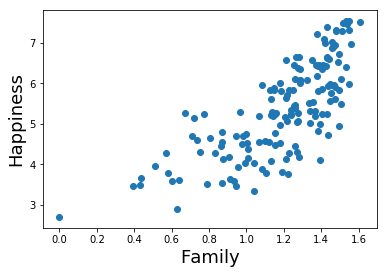

In [34]:
plt.scatter(family,happiness)
plt.xlabel('Family', fontsize=18)
plt.ylabel('Happiness', fontsize=18)

In [41]:
cov = np.cov([happiness,gdp])

In [42]:
cov

array([[1.27968152, 0.38674599],
       [0.38674599, 0.1770665 ]])

In [54]:
cov2 = np.cov([family,happiness])

In [55]:
cov2

array([[0.08251998, 0.24460965],
       [0.24460965, 1.27968152]])

In [52]:
x = np.array([[5,5], [5,6], [6,5], [6,6]])
c = np.cov(x.transpose())

In [68]:
cor = np.corrcoef([happiness,-gdp])

In [69]:
cor

array([[ 1.        , -0.81246875],
       [-0.81246875,  1.        ]])

In [63]:
cor2 = np.corrcoef([happiness,family])

In [64]:
cor2

array([[1.        , 0.75273667],
       [0.75273667, 1.        ]])

In [66]:
corrupt = np.array(d['Trust..Government.Corruption.'])

In [70]:
np.corrcoef(gdp,corrupt)

array([[1.       , 0.3509441],
       [0.3509441, 1.       ]])

In [72]:
cov = np.cov([gdp,happiness])

In [73]:
cov

array([[0.1770665 , 0.38674599],
       [0.38674599, 1.27968152]])

In [87]:
np.corrcoef(X.transpose())

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [82]:
cor

array([[1.        , 0.99599866, 0.99997391, ..., 0.65347343, 0.6339168 ,
        0.63315839],
       [0.99599866, 1.        , 0.99660709, ..., 0.70898277, 0.68625679,
        0.68483481],
       [0.99997391, 0.99660709, 1.        , ..., 0.65755616, 0.63763128,
        0.6368058 ],
       ...,
       [0.65347343, 0.70898277, 0.65755616, ..., 1.        , 0.99570813,
        0.99446012],
       [0.6339168 , 0.68625679, 0.63763128, ..., 0.99570813, 1.        ,
        0.99991588],
       [0.63315839, 0.68483481, 0.6368058 , ..., 0.99446012, 0.99991588,
        1.        ]])

In [76]:
cov[0,1] / np.sqrt(cov[0,0]*cov[1,1])

0.8124687538866411

In [88]:
np.corrcoef(X.transpose())

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [89]:
X.transpose().shape

(4, 150)

In [90]:
X.shape

(150, 4)

In [91]:
cor2 = np.corrcoef(X)

In [92]:
cor2.shape

(150, 150)